## Inference in SLR
### What do you know about the true population line? <br>
<br>


<center>
<img src="https://images.unsplash.com/photo-1500838752696-2a9bcfa9674a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=4140&q=80"
 width=600>
</center>




Photo by <a href="https://unsplash.com/@nate_dumlao?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Nathan Dumlao</a> on <a href="https://unsplash.com/photos/ipbVNCyRsX0?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

. A random sample will be used to estimate the population regression coefficients that fully characterized the linear association assumed among the variables.

In [1]:
# packages
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)

#data
dat <- read.csv("data/Assessment_2015.csv")
dat <- dat %>% filter(ASSESSCLAS=="Residential")  %>% 
        mutate(assess_val = ASSESSMENT / 1000)

set.seed(561)

dat_s <- sample_n(dat, 1000, replace = FALSE)


Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”


Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”


Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──



✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: Error in library(infer): there is no package called ‘infer’


## Last class: the regression framework

- Linear Regression Models provide a unifying framework to  <font color=blue> estimate  and  test </font> the true relation between different type of variables and a **continuous response**

- Linear Regression Models can also be used to <font color=blue> predict </font> the value of a **continuous response** (although it may not be the best predictive model)

- You assume that the conditional expectation of the response is linearly related to the input variable and the line is the **linear regression**


## Last class: estimation 

- The population regression coefficients ($\beta_0$ and $\beta_1$) are *unknown* and *non-random*

- You use a random sample to estimate them 

- **Least Squares** is one method to estimate the coefficients of a regression: it minimizes the sum of squares of the residuals

- In R, LS regression estimates can be computed using the `lm` function
   
- Using data from observational studies, we can not study any cause or effect between variables, only associations.

## Today: Inference

Using data, you can obtain point estimates of the regression coefficients. But, 

- how can you infer information about the *population regression parameters* using those *estimates*?

- your estimates depend on your sample. How much sample-to-sample variation do you expect?

## Estimators of the regression coefficients 

The LS regression estimators are functions of the random sample. Thus, they are also random variables. 

- We call them $\hat{\beta}_0$ and $\hat{\beta}_1$ to differentiate them from the population coefficients.

- As any other random variable, each estimator has a distribution. Since they are statistics, these distributions are called *sampling distributions*.

- As any other random variable, each estimator has a standard deviation. Since they are statistics, their SDs are called *standard errors* (SE).

- Both the SE and the sampling distribution are needed to make *inference about the population coefficients*.

## Measuring variation

#### Different samples result in different estimates!! but how much variation do you expect?<br>

<center>
<img src="https://images.unsplash.com/photo-1500838752696-2a9bcfa9674a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=4140&q=80"
 width=700>
</center>

Let's look at an example! <br>

Recall the estimates we obtained with the sample of 1000 houses `dat_s` from all properties in Strathcona County in Alberta `dat`:

In [4]:
lm_value <- lm(assess_val~BLDG_METRE,data=dat_s)%>%
                tidy()%>%mutate_if(is.numeric, round, 3)
many_SLR <- lm_value %>% select(term,estimate)

In [23]:
many_SLR

term,estimate
<chr>,<dbl>
(Intercept),90.769
BLDG_METRE,2.618


Take *another sample* from the full dataset and estimate the regression line again!

> **Important**: In practice, you will rarely take multiple samples!

> **NOTE**: This is NOT bootstrapping!! Why??

In [31]:
set.seed(301)

dat_rep2 <- rep_sample_n(dat, size = 1000)

# ANOTHER POINT ESTIMATES

lm_value_rep2 <- tidy(lm(assess_val~BLDG_METRE,data=dat_rep2))  %>% 
                    select(estimate) %>% mutate_if(is.numeric, round, 3)  %>% pull()
many_SLR <- many_SLR  %>% mutate(estimate2 = lm_value_rep2)

In [32]:
many_SLR

term,estimate,estimate2
<chr>,<dbl>,<dbl>
(Intercept),90.769,28.833737
BLDG_METRE,2.618,3.017228


In [33]:
set.seed(30)

dat_rep3 <- rep_sample_n(dat, size = 1000)

# ANOTHER POINT ESTIMATES

lm_value_rep3 <- tidy(lm(assess_val~BLDG_METRE,data=dat_rep3))  %>% 
                    select(estimate) %>% mutate_if(is.numeric, round, 3) %>% pull()
many_SLR <- many_SLR  %>% mutate(estimate3 = lm_value_rep3)


In [34]:
many_SLR

term,estimate,estimate2,estimate3
<chr>,<dbl>,<dbl>,<dbl>
(Intercept),90.769,28.833737,117.497738
BLDG_METRE,2.618,3.017228,2.447751


#### and so on .... as you take new samples you get different *estimates* of the regression parameters

### The standard error!!

The variation of these estimates from sample to sample is measured by their standard deviation, which has a special name: *the standard error* (SE)

> But in practice, how can we compute the standard error if we have only 1 sample?? 

We have different ways of answering this question:

1. use a theoretical result! This is what `lm` does!!

2. use bootstrapping!! As you did in STAT 201 for other quantities!! 

In [35]:
lm_value

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.769,9.793,9.268,0
BLDG_METRE,2.618,0.059,44.514,0


**Caution**: these SE measure the sample-to-sample variation of each estimate, not the predicted value from the line. Thus, you can't visualize them in a usual scatter plot. 

Choosing `se=TRUE` in `geom_smooth` you get bands for the predicted values

In [5]:
options(repr.plot.width = 8, repr.plot.height = 5)

plot_value <- dat_s %>% ggplot(aes(BLDG_METRE, assess_val)) + 
  xlab("building size (mts)") + 
  ylab("assessed value ($/1000)") +
  geom_point() +
  geom_smooth(method = lm, se = TRUE, color = "blue", level=0.99) +
  ggtitle("The bands are NOT the SE of the estimators")

`geom_smooth()` using formula = 'y ~ x'


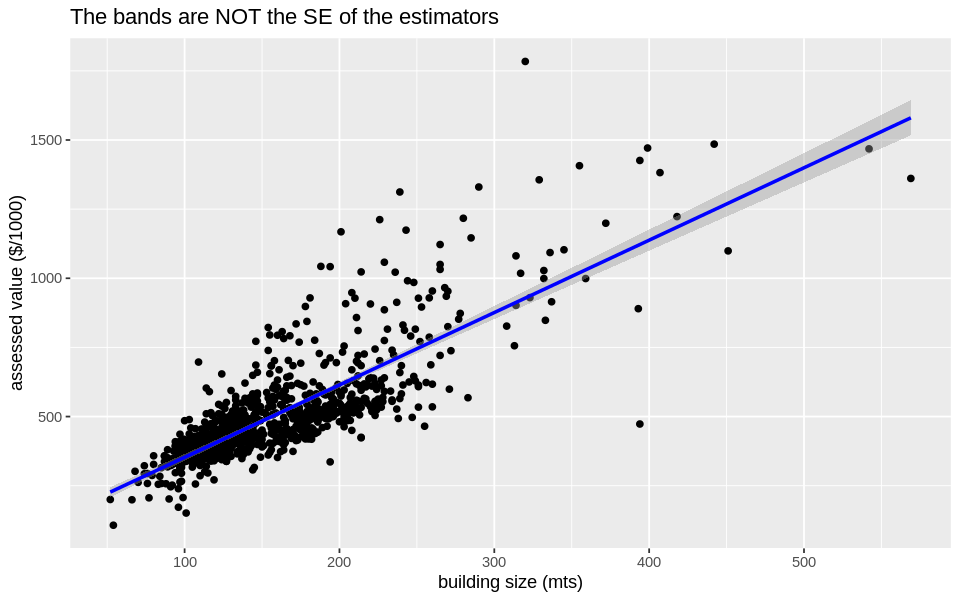

In [6]:
plot_value

## Hypothesis Tests

Is the input variable linearly associated with the response?

| | **Intercept** | **Slope** | 
| ----------------|-------------------------------| ------------------------------- | 
| null hypothesis $H_0:$| $\beta_0$ = $0$ | $\beta_1$ = $0$| 
| alternative hypothesis $H_1:$|  $\beta_0$ $\neq$ $0$ | $\beta_1$ $\neq$ $0$| 


#### Note that we have separate tests for each parameter in the regression

### The statistic

You can use the estimated coefficients and check how far the estimate is from $0$. 

> how far is far??

The standard error can be used to construct a statistic. For example, the statistic of the slope is

$$T = \frac{\hat{\beta}_1 - 0}{\text{SE}(\hat{\beta}_1)}$$

- an estimate of the SE is given in the column `std.error` of `tidy` table

- the value of this statistic is given in the column `statistic` of `tidy` table

### The p-value

In the `tidy` table, you can also find $p$-values in the column `p.value`. 

> how are these p-values computed?? and for which hypotheses??

You need the sampling distributions (distribution of the estimators $\hat{\beta}_0$ and $\hat{\beta}_1$) to compute $p$-values!!

In [44]:
lm_value

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.769,9.793,9.268,0
BLDG_METRE,2.618,0.059,44.514,0


**Caution**: the alternative hypothesis in `lm` is $H_1: \beta_j \neq 0$, for all $j$th coefficients. 

The `p.value` is interpreted as the probability, under $H_0$, that $\mid T \mid$ is equal or larger than the value observed in your sample 

For example, assuming the true slope is zero, the probability of observing a slope as large or larger than 2.618 is less than 0.001. 

### Decision rule

> The smaller the $p$-value, the stronger the evidence against $H_0$. 

A small $p$-values (less than the significance level $\alpha$) indicate that the data provides enough statistical evidence against the null hypothesis of no association (i.e., to reject $H_0$).

The fact that you have observed a slope of 2.618 provides enough evidence against the null hypothesis. At a significance level of $\alpha = 0.01$ we reject $H_0$. 

> The estimated slope is significantly different from 0.

**Heads up**: in the last years, the scientific community has identified the "crisis of p-values". You can read more about it in [this article](https://www.nature.com/articles/d41586-019-00857-9) and in the [ASA statement](https://www.stat.berkeley.edu/~aldous/Real_World/ASA_statement.pdf).

## Confidence Intervals

While point estimates provide a single guess about the population coefficients, you may prefer to have a range of values

<center>
<img src="https://images.unsplash.com/photo-1605771233539-97cf9e108694?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3542&q=80"
 width=600>
</center>

Photo by <a href="https://unsplash.com/@lahiru_iddamalgoda?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">lahiru iddamalgoda</a> on <a href="https://unsplash.com/photos/Cx2eiOj_K9o?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>. Analogy from [ModernDive](https://moderndive.com/8-confidence-intervals.html)
  

Confidence intervals (CIs) reflect the uncertainty of our regression estimates and can be used to make inference about the regression coefficients. 

### Classical CIs

$$\Big(\hat{b} - \text{SE}(\hat{b}) \times t_{\alpha/ 2, n - k}, \hat{b} + \text{SE}(\hat{b}) \times t_{\alpha/ 2, n - k}\Big)$$

where 

- $\text{SE}(\hat{b})$ is the (estimated) SE of the estimator 

- $n$ is the sample size and $k$ the number of regression parameters 

- The $t_{\alpha/ 2, n - k}$ is the **quantile of the $t$-distribution** with $n - k$ degrees of freedom!! 

**Heads up**: this result is based in classical theoretical approximations (CLT) or distributional assumptions!!

There are also many missunderstandings around the concept of CIs

A 95% CI computed from the data is **not** a range of values that contains the true regression parameter with 95% probability. 

> Once the interval has been computed based on the data, *nothing is random*! so it either covers or not the true value. 

Among many CIs computed from different samples, 95% of them contain the true regression parameter. Thus, we are 95% *confident* that the true coefficient is in the given range. 

Recall from ModernDive:

<center>
<img src="https://d33wubrfki0l68.cloudfront.net/2d2e483414940e38694400a6ae4a69ca4afb7970/29dd2/moderndive_files/figure-html/reliable-percentile-1.png"
 width=700>
</center>


In [50]:
lm_value_CIs <- tidy(lm(assess_val~BLDG_METRE,data=dat_s), conf.int = TRUE) %>% mutate_if(is.numeric, round, 3)

In [7]:
lm_v <- lm(assess_val~BLDG_METRE,data=dat_s)
tidy(data=lm_v, conf.int = TRUE)

ERROR: Error in warn_on_subclass(x, "tidy"): argument "x" is missing, with no default


In [51]:
lm_value_CIs

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.769,9.793,9.268,0,71.551,109.987
BLDG_METRE,2.618,0.059,44.514,0,2.502,2.733


## The Sampling Distribution

We mentioned before that the estimators of the regression coefficient, $\hat{\beta}_0$ and $\hat{\beta}_1$, are *random variables*. 

Then they also have a *distribution*, called the *sampling distribution*, which we can use to compute $p$-values!!

> how do we know the *sampling distribution* of the estimators of the regression coefficients??

We have different ways of answering this question:

1. use a theoretical result! This is what `lm` does!!

2. use bootstrapping!!


#### Theoretical results 

<center>
<img src="https://bookdown.org/roback/bookdown-BeyondMLR/bookdown-BeyondMLR_files/figure-html/OLSassumptions-1.png"
 width=500>
</center>

Images from [Beyond Multiple Linear Regression (BMLR)](https://bookdown.org/roback/bookdown-BeyondMLR/)

In regression, it is usually assumed that the conditional distribution of the error terms is Normal!!

> this assumption is not always needed but it guarantees that the linear model is a good fit to the data!

**Classical Theory 1**: if we assume that the (conditional) distribution of the error terms is Normal, under $H_0$, the statistic $T$ follows a $t$-distribution with $n - k$ degrees of freedom,

where $n$ is the sample size and $k$ the number of regression parameters

**Important: <font color="blue">CLT to the rescue</font>**: if the assumption is not true but the conditional distribution of the error terms is *nice enough* (under certain conditions), and if the *sample size is large*, then 

**Classical Theory 2**: under $H_0$, the Central Limit Theory can be used to prove that the statistic $T$ follows *approximately* a $t$-distribution with $n - k$ degrees of freedom
    
> This theoretical result is used by `lm` to compute p-values and confidence intervals!!

`lm` approximates the sampling distribution with a $t$-distribution with $n - k$ degrees of freedom 

> **Heads up**: what can we do if the assumptions do not hold? or if we don't want to use LS estimators? or if the sample size is not large to use approximations?

### Bootstrapping

>  **Historical note**: The term bootstrapping originates from the phrase "to pull oneself up by one's bootstraps", which refers to completing a seemingly impossible task with no external help. 

In Statistics, bootstrapping refers to sampling from our original sample **with replacement** (also called **resampling with replacement**) to generate a **bootstrap sampling distribution**. 

>  **Heads up**: **sampling with replacement** means that each time we choose an observation from the sample, we return it before randomly selecting another. Resampling with replacement is required to get enough samples to approximate the sampling variation.

The idea is to use the original sample as an *estimate* of the unknown population. The single sample acts as the "bootstraps" that we can use to "pull ourselves up" and create an approximation of sampling distribution.

<font color="blue">Again, note that we are sampling from the sample!! not from the population!!</font>

## Bootstrapping
<br>
<center>
<div style="overflow:hidden;">
   <img src="https://images.unsplash.com/photo-1605812860427-4024433a70fd?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3456&q=80" width=400 alt="" style="margin:-5% 0px -10% 0px;" />
</div>
  </center>
  
Photo by <a href="https://unsplash.com/@nampoh?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Maxim Hopman</a> on <a href="https://unsplash.com/photos/8cT5ja0P_N4?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

>  **Historical note**: The term bootstrapping originates from the phrase "to pull oneself up by one's bootstraps", which refers to completing a seemingly impossible task with no external help. 

The collected sample acts as the "bootstraps" that you can use to "pull yourselves up" to approximate of sampling distribution.

- You use the original sample as an *estimate* of the unknown population 

- You sample from your original sample **with replacement** to generate a new sample of same size!

- To obtain different samples of equal size, you need to sample **with replacement**

<font color="blue">Again, note that we are sampling from the sample!! not from the population!!</font>

<center>
<img src="https://github.com/UBC-STAT/stat-301/blob/master/supplementary-material/img/bootstrapping.png?raw=true" width=700>
</center>

Using *bootstraping*, we generate a *long* list of estimates to compute *empirically* the sampling distribution!

- sample with replacement to obtain $B$ samples of size $n$

- for each sample, compute the estimated regression coefficients

- use the $B$ regression estimates to calculate the sampling distribution


In [10]:
set.seed(123)

n <- 1000
B <- 10000

lm_boot <- replicate(B, {
  sample_n(dat_s, n, replace = TRUE) %>%
    lm(formula = assess_val~BLDG_METRE, data = .) %>%
    .$coef
})
lm_boot <- data.frame(boot_intercept = lm_boot[1, ], boot_slope = lm_boot[2, ])

In [11]:
head(lm_boot)

,boot_intercept,boot_slope
,<dbl>,<dbl>
1,77.60172,2.734390
2,91.29174,2.604643
3,70.83473,2.798641
4,77.41625,2.726911
5,108.46348,2.454075
6,119.70836,2.420410


In [12]:
tail(lm_boot)

,boot_intercept,boot_slope
,<dbl>,<dbl>
9995,67.00700,2.772294
9996,102.80346,2.514296
9997,87.62634,2.638956
9998,81.86622,2.671669
9999,77.52043,2.719633
10000,86.87740,2.617274


### We generated 10000 estimates of the intercept and the slopes using only 1 sample!!!

We can visualize the distribution of these values! 

In [13]:
options(repr.plot.width = 8, repr.plot.height = 5)

slope_sampling_dist <-  ggplot(lm_boot, aes(x = boot_slope)) +
    geom_histogram(color = "white", fill = "blue") +
    xlab("Estimated Slope") +
    ggtitle("Sampling distribution for the estimator of the slope")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


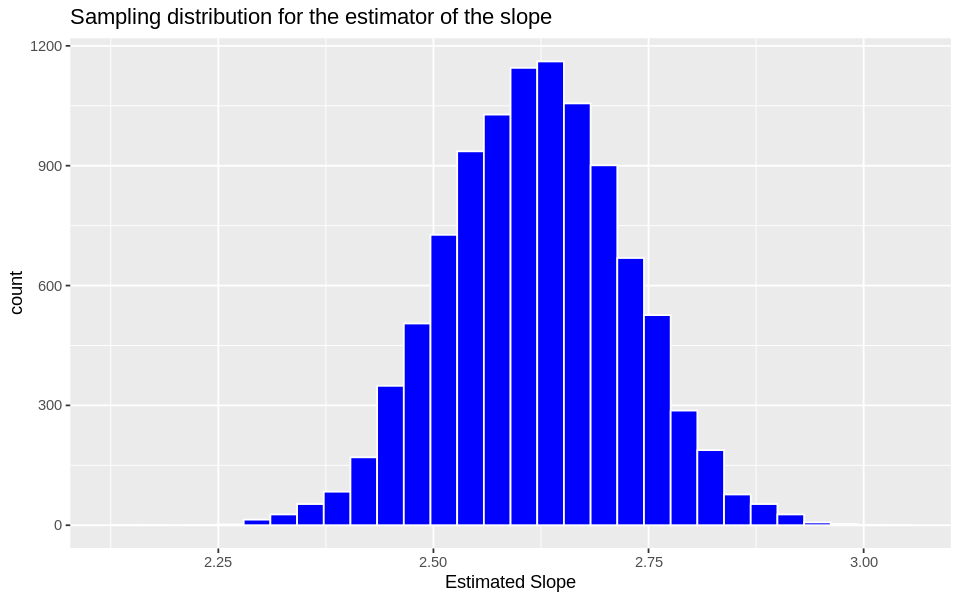

In [14]:
slope_sampling_dist

### This is an approximation of the sampling distribution

### Does the number of replicates matter?

The larger the replication, the longer the list of estimates to better approximate of the sampling distribution!

### Does the sample size matter?

Our estimator depends on a random sample and thus on its size! 

- The SE of the estimator decreases with the sample size. Thus, the sampling distribution becomes tighter

- From the CLT: the sampling distribution becomes smoother and more "bell-shaped as the sample size increases.

## Bootstrap Confidence Intervals

You can use the bootstrapping sampling distribution to compute CIs of regression parameters. There are various methods:

- **Standard error method**: use the list of bootstrap estimates to approximate (only) the SE of the estimator

$$ \Big(\hat{\beta}_1 - z_{\alpha/2} \text{ SE}^*, \hat{\beta}_1 - z_{1-\alpha/2} \text{ SE}^*\Big)$$

- **Percentile method**: use the list of bootstrap estimates to the range using quantiles


$$\Big(\hat{\beta}^*_{j,\alpha/2}, \hat{\beta}^*_{j,1 - \alpha/2}\Big)$$

In [15]:
options(repr.plot.width = 8, repr.plot.height = 5)

slope_sampling_dist <-  ggplot(lm_boot, aes(x = boot_slope)) +
    geom_histogram(color = "white", fill = "blue") +
    xlab("Estimated Slope") +
    ggtitle("Sampling distribution for the estimator of the slope")+
    geom_vline(aes(xintercept = quantile(boot_slope,0.025)),size=1)+
    geom_vline(aes(xintercept = quantile(boot_slope,0.975)),size=1) +
    geom_segment(aes(x = quantile(boot_slope,0.025), y = 0, xend = quantile(boot_slope,0.975), yend = 0, 
        colour = "red", linewidth= 2),show.legend = FALSE)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


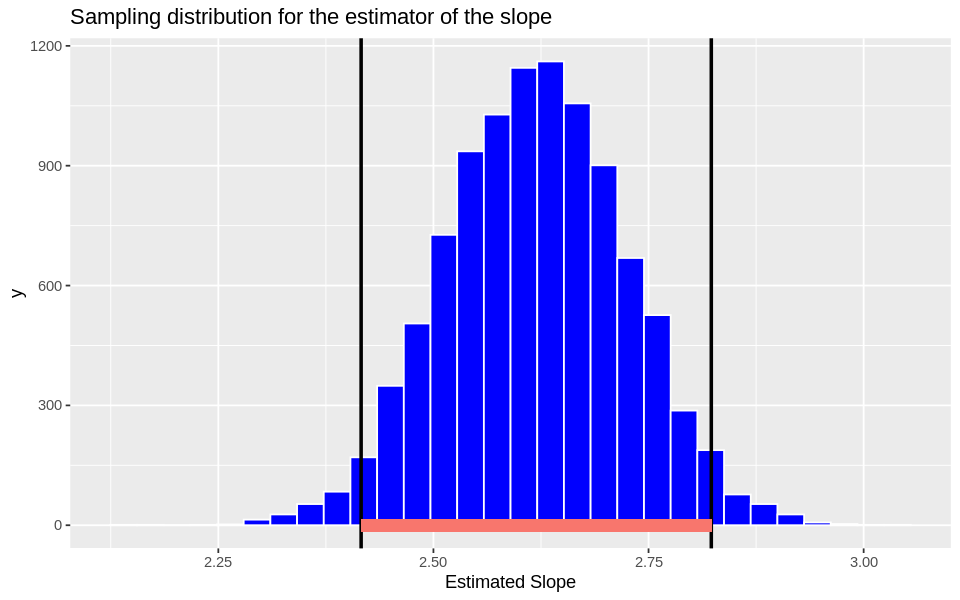

In [16]:
slope_sampling_dist